# Import Essential Libraries

In [3]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from typing import List


# Data Preparation

In [4]:
# Import the dataset -  Udemy Courses
rawcoursedata = pd.read_csv('../../dataset/Course_info.csv')
# Create a copy of the Dataset
coursedata_clean = rawcoursedata.copy()
# Remove non-usable columns
coursedata_clean.drop(['course_url', 'instructor_url','id'],axis=1,inplace=True)
#select col in use
data_raw = pd.DataFrame(rawcoursedata[['language','category','subcategory','price']])

In [5]:
# Calculate the quartiles
Q1 = data_raw.quantile(0.25)
Q3 = data_raw.quantile(0.75)
# Rule to identify outliers
rule = ((data_raw < (Q1 - 1.5 * (Q3 - Q1))) | (data_raw > (Q3 + 1.5 * (Q3 - Q1))))
# Find the rows where ANY column is True
outliers = rule.any(axis = 1)
# Find the row indices correspond to outliers in the dataframe
outlierindices = outliers.index[outliers == True]
# Remove the outliers based on the row indices obtained above
data_raw.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
clean_data = data_raw.copy()
clean_data

/tmp/ipykernel_2297/2166292625.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data_raw.quantile(0.25)
/tmp/ipykernel_2297/2166292625.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data_raw.quantile(0.75)
/tmp/ipykernel_2297/2166292625.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  rule = ((data_raw < (Q1 - 1.5 * (Q3 - Q1))) | (data_raw > (Q3 + 1.5 * (Q3 - Q1))))


,language,category,subcategory,price
0,English,Lifestyle,Food & Beverage,24.99
1,English,Business,Entrepreneurship,0.00
2,English,Lifestyle,Other Lifestyle,19.99
3,English,Lifestyle,Pet Care & Training,199.99
4,English,Design,Web Design,159.99
...,...,...,...,...
209729,English,Teaching & Academics,Language Learning,19.99
209730,English,IT & Software,IT Certifications,49.99
209731,English,IT & Software,IT Certifications,49.99
209732,English,Finance & Accounting,Other Finance & Accounting,119.99


## 2. Exploratory Data Analysis / Visualization

### 2.1 Language vs Price

In [6]:
clean_data[["language","price"]].groupby(["language","price"]).sum().sort_values(by = "price", ascending = False).head(10)

,
language,price
Arabic,219.99
English,219.99
Polish,219.99
Korean,219.00
Norwegian,219.00
English,209.99
Portuguese,209.90
Korean,209.00
Japanese,199.99


In [7]:
lang =pd.DataFrame(clean_data[['language']])
top = lang['language'].value_counts().iloc[:5]
top
#lang['count'] = len(clean_data.language.unique())


English       122507
Spanish        16239
Portuguese     15869
Japanese        7006
German          6100
Name: language, dtype: int64

In [8]:
#s=clean_data['category'].groupby(clean_data['language']).value_counts().head(5)


In [9]:
a = clean_data[clean_data['language'].isin(['English','Spanish','Portuguese','Japanese','German'])]
a['language'].count()

167721

<AxesSubplot: xlabel='category', ylabel='language'>

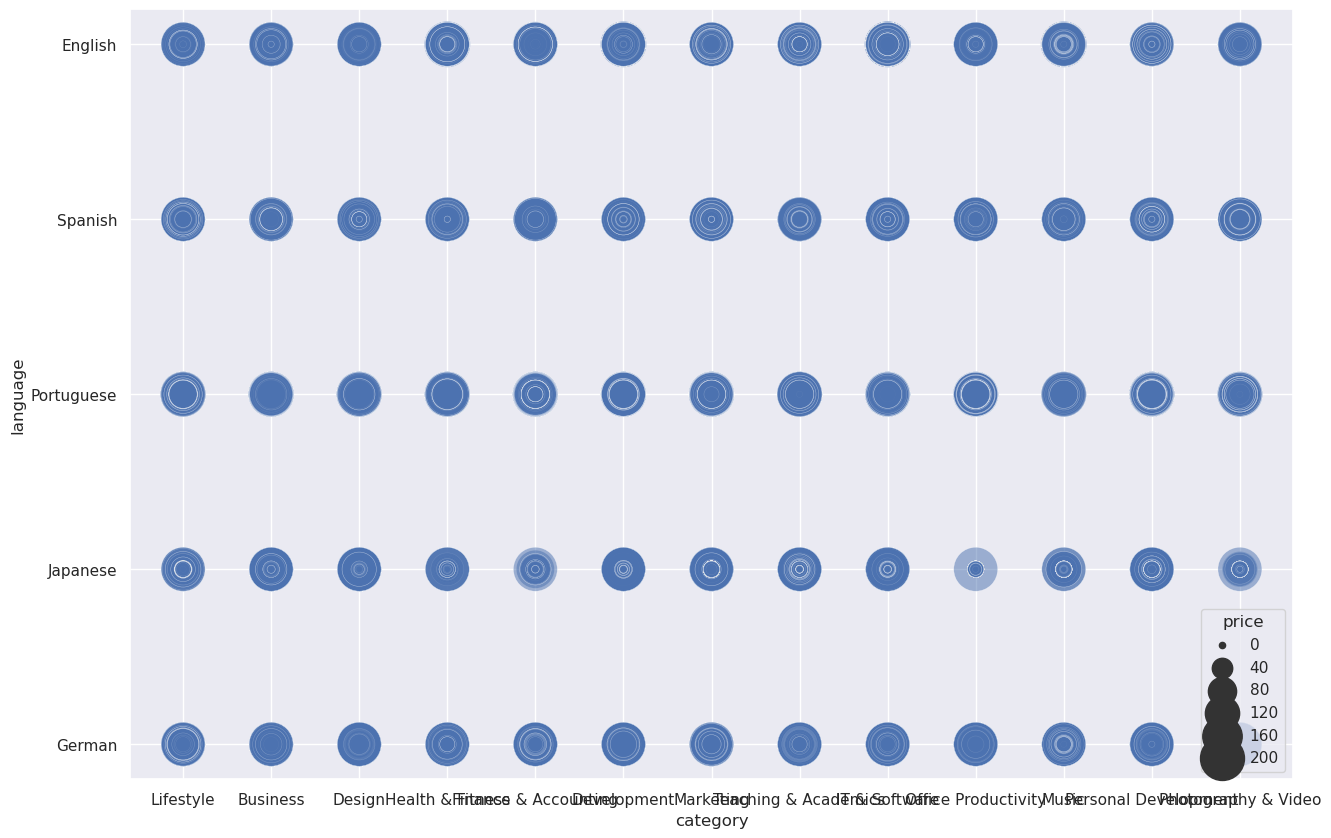

In [10]:
language = a.language
price = a.price
category=a.category
plt.figure(figsize = (15,10))
sb.scatterplot(x=category,y=language, size = price, alpha = 0.5,sizes=(20, 1100))
#plt.show()